# 项目概述
这是一个关于"FBI枪支数据"的报告

## 提出问题
1. 枪支数量与日期的关系是什么样的？
2. 枪支数量与州之间的关系是怎么样随着日期的变化而变化的？
3. 人均持枪量与州之前的关系是怎么样的？

## 数据整理
在这里需要导入数据，并对数据进行清理

In [1]:
# 导入必须的包
import csv
import numpy as np
import pandas as pd
% matplotlib inline

In [2]:
# 加载枪支数据
gun_df = pd.read_csv('gun_data.csv')
gun_df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [3]:
gun_df.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


In [4]:
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [13]:
# 加载人口数据
census_df = pd.read_csv('U.S. Census Data.csv')
census_df.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [8]:
census_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
Virginia,"8,411,808","8,001,041",5.10%,"8,001,024",6.10%,6.40%,22.20%,23.20%,14.60%,12.20%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Washington,"7,288,000","6,724,545",8.40%,"6,724,540",6.20%,6.50%,22.40%,23.50%,14.80%,12.30%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
West Virginia,"1,831,102","1,853,011",-1.20%,"1,852,994",5.50%,5.60%,20.50%,20.90%,18.80%,16.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wisconsin,"5,778,708","5,687,289",1.60%,"5,686,986",5.80%,6.30%,22.30%,23.60%,16.10%,13.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wyoming,"585,501","563,767",3.90%,"563,626",6.50%,7.10%,23.70%,24.00%,15.00%,12.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, Fact to Wyoming
Data columns (total 85 columns):
0     51 non-null object
1     51 non-null object
2     51 non-null object
3     51 non-null object
4     51 non-null object
5     51 non-null object
6     51 non-null object
7     51 non-null object
8     51 non-null object
9     51 non-null object
10    51 non-null object
11    51 non-null object
12    52 non-null object
13    52 non-null object
14    52 non-null object
15    52 non-null object
16    52 non-null object
17    51 non-null object
18    52 non-null object
19    51 non-null object
20    51 non-null object
21    51 non-null object
22    51 non-null object
23    51 non-null object
24    51 non-null object
25    51 non-null object
26    51 non-null object
27    51 non-null object
28    51 non-null object
29    51 non-null object
30    51 non-null object
31    51 non-null object
32    51 non-null object
33    51 non-null object
34    51 non-null object
35    51 non-null o

## 数据探索

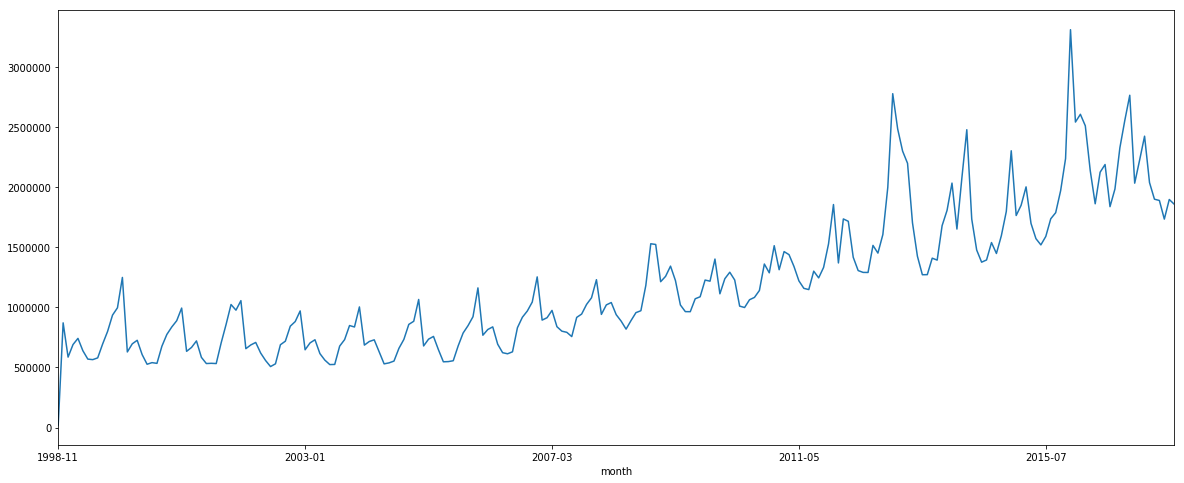

In [10]:
# 枪支总数与日期的关系
gun_df.groupby(['month'])['totals'].sum().plot(figsize=(20,8))

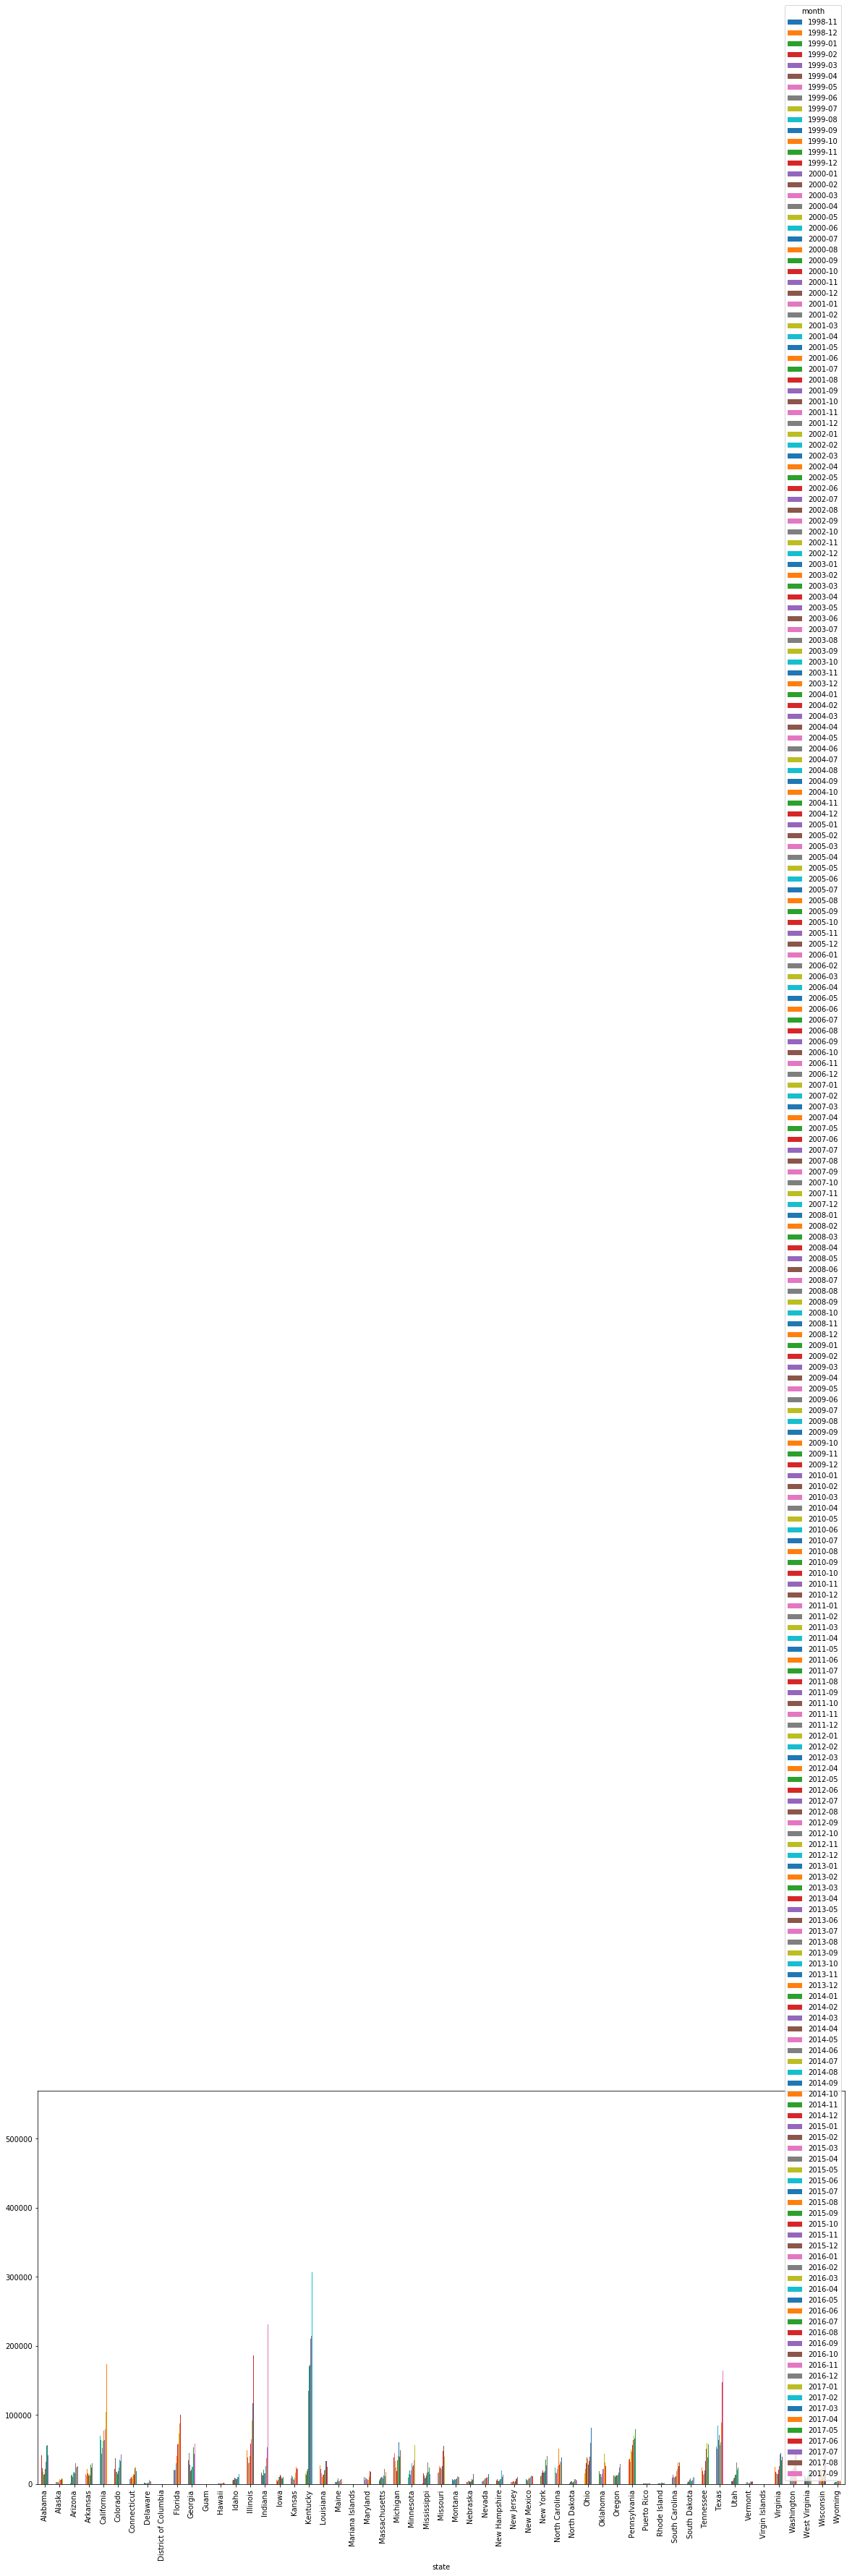

In [11]:
# 各州在不同时期下的持枪数量情况是什么样的
# 这里其实希望的是能按照每个州分别画图，而不是挤在同一个图上，但是实在搞不出来了。这张图要跑的时间比较久
gun_df.groupby(['state', 'month'])['totals'].sum().unstack().plot(figsize=(20, 10), kind='bar')

In [95]:
# 人均枪支持有量与州之间的关系，这个实在搞不来怎么用dataframe计算人均枪支持有量
population = census_df[0:1]
population.T

,0
Fact,"Population estimates, July 1, 2016, (V2016)"
Fact Note,NaN
Alabama,"4,863,300"
Alaska,"741,894"
Arizona,"6,931,071"
Arkansas,"2,988,248"
California,"39,250,017"
Colorado,"5,540,545"
Connecticut,"3,576,452"
Delaware,"952,065"


In [64]:
guns = gun_df[gun_df.month == '2016-06'][['state', 'totals']]
guns

,state,totals
825,Alabama,44976
826,Alaska,7406
827,Arizona,32540
828,Arkansas,18779
829,California,173846
830,Colorado,41134
831,Connecticut,33475
832,Delaware,4987
833,District of Columbia,72
834,Florida,125567


In [74]:
# 找出所有的州
states = guns['state'].unique()
states

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

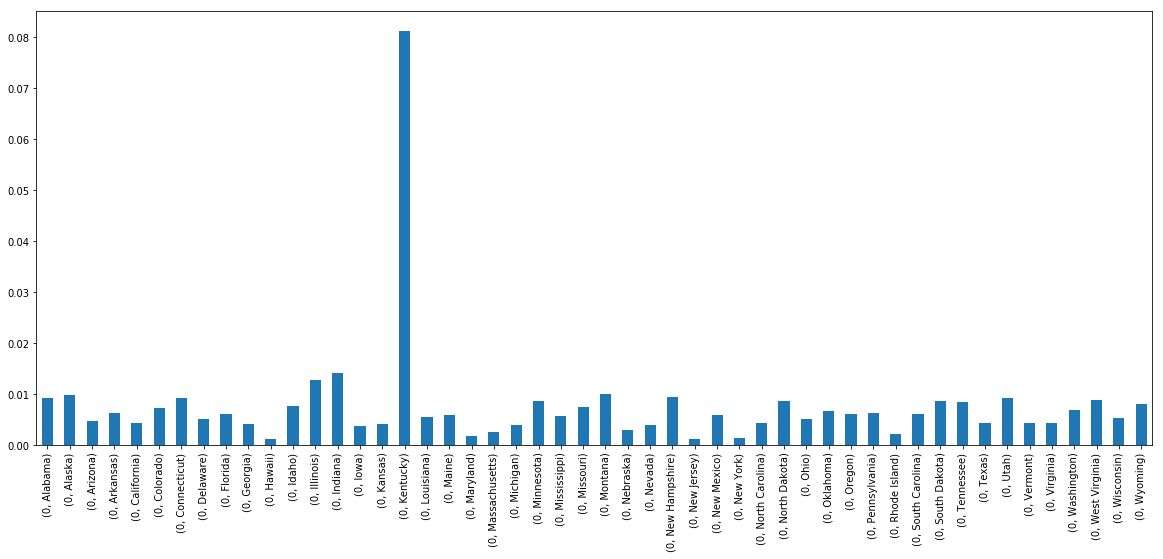

In [109]:
# 找出所有州的人均枪支持有量
avgs = {}
for s in states:
    try:
        people_num_str = population[s].values[0].replace(',', '')
        people_num = int(people_num_str)   
        gun_num = int(guns[guns.state == s]['totals'].values[0])
        avgs[s] = [gun_num * 1.0 / people_num]
    except:
        continue
avgs_df = pd.DataFrame(avgs)
avgs_df.stack().plot(kind='bar', figsize=(20, 8))

## 得出结论
1. 枪支数量与日期的关系是什么样的？
由于只有当前的数据，且未来的情况无法知道。在当前来说，从整体来看，枪支数量是随着日期的增加而逐步增加的。
2. 枪支数量与州之间的关系是怎么样随着日期的变化而变化的？
截止2017年9月，有的州枪支数量逐渐变多，有的州枪支数量增减具有波动性。
3. 人均持枪量与州之前的关系是怎么样的？
从2016年6月的数据看，Kentucky州的人均持枪量要高于其他州。